# Part 1: 
In your project you have been working with a bias dataset. Most probabely suupervised models were underfit. You should remember that this is a real dataset, and in real life most of the time you dont have access to clean and unbias dataset. In situations like this, none of the regression models will have a good fit for the dataset due to the large predence of the 0s. In the first part of this take-home exam, you are asked to be creative, and find a solution for this problem. 

For this dataset, you can break the problem, into a two-step machine learning model. 

First step is to classify the data points as positive revenue and zero revenue. This simply is a binary classification. You should remember that when you are dealing with biased datasets, accuracy is not a reliable scoring metric. So look for a robust scoring function. 

Next, you need to build a regression model to postprocess classification results. Here is a flow chart to show you the outline of the model. 

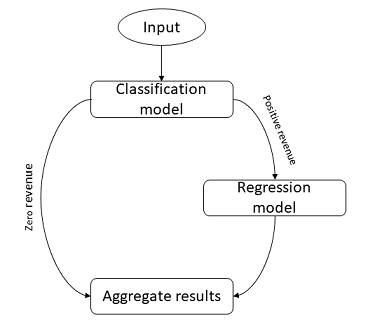

In [116]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Load data

In [2]:
gstore = pd.read_csv('data.csv')
gstore.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


In [3]:
gstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

#### Only 193 transactions revenue is above zero, else is zero.

In [4]:
gstore.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


### I take JSON type columns out to another dataframe called gJSON in order to easy change the type of value.

In [5]:
gJSON = pd.read_csv('data.csv', usecols=['customDimensions','device','geoNetwork','hits','trafficSource'])
gJSON.head()

,customDimensions,device,geoNetwork,hits,trafficSource
0,"[{'index': '4', 'value': 'EMEA'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...","{'campaign': '(not set)', 'source': 'google', ..."
1,"[{'index': '4', 'value': 'North America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",{'referralPath': '/a/google.com/transportation...
2,"[{'index': '4', 'value': 'North America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...","{'isTrueDirect': True, 'campaign': '(not set)'..."
3,"[{'index': '4', 'value': 'EMEA'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...","{'campaign': '(not set)', 'source': 'google', ..."
4,"[{'index': '4', 'value': 'Central America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...","{'campaign': '(not set)', 'source': 'google', ..."


In [6]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic


def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic


def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))


def replace(x):
    return  json.loads(x.replace('\'','\"').replace('False', 'false').replace('True'))

### I wrote a method to grab the data in the feathers that I think is useful then put them into a dataframe

In [7]:
JSON_FEATURES = {'customDimensions': ['value'],'device': ['deviceCategory','browser'], 'geoNetwork':['continent','country']}
df = pd.DataFrame()
for feature in JSON_FEATURES.keys(): #feature = 'device'
    for item in JSON_FEATURES[feature]:  #JSON_FEATURES['device'] = ['deviceCategory','browser'], item = 'deviceCategory'or'browser'
        Temp = []
        for i in range(len(gJSON)):
            val = gJSON[feature][i].replace('\'', '\"').replace('False', 'false').replace('True','true')
            obj = json.loads(val)
            if isinstance(obj, list):
                if len(obj) == 0:
                    Temp.append('NaN')  #use 'NaN' for missing data
                else:
                    Temp.append(obj[0][item])
            else:
                if item not in obj.keys():
                    Temp.append('NaN')  #use 'NaN' for missing data
                else:
                    Temp.append(obj[item])
        df_temp = pd.DataFrame({item:Temp}) 
        df = df_temp.join(df)

gClean = df
gClean.head()

,country,continent,browser,deviceCategory,value
0,Germany,Europe,Firefox,desktop,EMEA
1,United States,Americas,Chrome,desktop,North America
2,United States,Americas,Chrome,mobile,North America
3,Turkey,Asia,Chrome,desktop,EMEA
4,Mexico,Americas,Chrome,desktop,Central America


In [8]:
gCleanest = gstore[['channelGrouping']].join(gClean)
gCleanest.head()

,channelGrouping,country,continent,browser,deviceCategory,value
0,Organic Search,Germany,Europe,Firefox,desktop,EMEA
1,Referral,United States,Americas,Chrome,desktop,North America
2,Direct,United States,Americas,Chrome,mobile,North America
3,Organic Search,Turkey,Asia,Chrome,desktop,EMEA
4,Organic Search,Mexico,Americas,Chrome,desktop,Central America


### Change Categories data type to dummy data (0,1) so that help me to calculate

In [9]:
gDummy = pd.get_dummies(gCleanest)
gDummy.head()

,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,country_(not set),country_Afghanistan,country_Albania,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Find missing data. I will later than drop the columns that include too many missing data where missing data exceed over 50 percent of the column.

In [10]:
def missing_data(data):
    count = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    df = pd.concat([count, percent], axis=1, keys=['Count', 'Percent%'])
    return df.loc[~(df['Count']==0)]

missing_data(gstore)

,Count,Percent%
totals_transactionRevenue,19807,99.035
totals_totalTransactionRevenue,19807,99.035
totals_transactions,19804,99.020
totals_sessionQualityDim,10880,54.400
totals_bounces,10127,50.635
totals_timeOnSite,9899,49.495
totals_newVisits,4912,24.560
totals_pageviews,1,0.005


In [11]:
gDrop = gstore.join(gDummy).drop(['channelGrouping','date','visitStartTime','customDimensions','device','fullVisitorId',
                                  'hits','geoNetwork','socialEngagementType','trafficSource','visitId',
                                  'totals_totalTransactionRevenue','totals_transactions','totals_sessionQualityDim',
                                  'totals_bounces'],axis=1)
gDrop.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1,1.0,1.0,NaN,NaN,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,6,2,NaN,2.0,28.0,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2,1.0,2.0,38.0,NaN,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,2,1.0,2.0,1.0,NaN,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2,1.0,2.0,52.0,NaN,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Fill missing data with mean value in ``totals_timeonSite`` column 

In [12]:
gDrop[['totals_timeOnSite']] = gDrop[['totals_timeOnSite']].fillna(gDrop[['totals_timeOnSite']].mean())
gDrop[['totals_timeOnSite']].head()

,totals_timeOnSite
0,264.244629
1,28.000000
2,38.000000
3,1.000000
4,52.000000


### Then fill missing data with 0 value in other columns

In [13]:
gLast = gDrop.fillna(0)
gLast.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1,1.0,1.0,264.244629,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,6,2,0.0,2.0,28.000000,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2,1.0,2.0,38.000000,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,2,1.0,2.0,1.000000,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2,1.0,2.0,52.000000,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### gLast is the dataset after clean-up (change JSON datatype, drop useful columns, fill up miss data)
### Next, to do classification model, I have to change **total_transactionRevenue** columns to binary datatype (0 and 1). If zero revenue then represent 0, positive revenue then represent 1

In [14]:
X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = gLast[['totals_transactionRevenue']]

In [15]:
y_binary = (y > 0).astype(int)  #Change total_transactionRevenue to binary datatype. 
# If zero revenue then represent 0, positive revenue then represent 1
y_binary.describe() 

,totals_transactionRevenue
count,20000.000000
mean,0.009650
std,0.097762
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
y_binary[y_binary['totals_transactionRevenue'] == 1].count() #There are 193 positive revenues in this dataset

totals_transactionRevenue    193
dtype: int64

In [17]:
X.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1,1.0,1.0,264.244629,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,6,2,0.0,2.0,28.000000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2,1.0,2.0,38.000000,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,2,1.0,2.0,1.000000,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,2,1.0,2.0,52.000000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [18]:
gLast.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
0,1,1,1.0,1.0,264.244629,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,6,2,0.0,2.0,28.000000,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,2,1.0,2.0,38.000000,0.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,2,1.0,2.0,1.000000,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2,1.0,2.0,52.000000,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## Classification model- Knn neighbor

#### split whole data into train and test data, also scale the data

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

X = gLast[gLast.columns.drop('totals_transactionRevenue',1)]
y = y_binary

X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler() # normalize data to [0,1] 
X_train = scaler.fit_transform(X_train_original)
X_test = scaler.transform(X_test_original)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

/Users/kemengting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


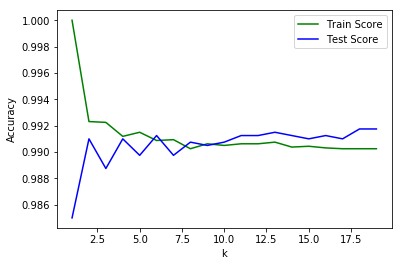

In [25]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
knn = KNeighborsClassifier(6)   
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

/Users/kemengting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


### There are 99 percentage that Knn classifier can predict correct on both train and test set

## Second part, drop zero revenue data, run regression model with positive revenue data  and predict the revenue to see how well the model can predict revenue accurately. I pick Ridge linear regreesion as the model due to high dimensionality
## Regression model- Ridge linear regression

In [28]:
g193 = gLast[gLast['totals_transactionRevenue']>0]
g193.head()

,visitNumber,totals_hits,totals_newVisits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_visits,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,...,browser_YaBrowser,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,value_APAC,value_Central America,value_EMEA,value_NaN,value_North America,value_South America
433,4,9,0.0,9.0,261.0,15190000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
550,11,15,0.0,12.0,285.0,8000000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
555,6,15,0.0,15.0,1044.0,57300000.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
597,17,18,0.0,16.0,514.0,18230000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
619,1,21,1.0,20.0,487.0,12310000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [109]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = g193[g193.columns.drop('totals_transactionRevenue',1)]
y = g193['totals_transactionRevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
yRidge = reg.predict(X_test) 
yRidge

array([ 3.82289098e+07,  1.33581327e+08,  1.97395621e+08,  1.09768437e+08,
        5.49079872e+07,  3.73671124e+07,  3.76428590e+07,  1.39701964e+08,
        7.22918524e+07,  4.04682099e+07, -1.18463234e+06,  2.48160513e+08,
        2.27605367e+06,  2.37200808e+08,  8.95574620e+07,  1.13502211e+08,
        3.87504743e+07,  2.94800961e+07,  6.21637292e+07,  1.96380093e+08,
        5.82572529e+07,  1.85135290e+08,  3.99317304e+07,  1.01323284e+08,
        1.33045512e+08,  1.88473219e+08,  7.73718318e+07,  3.32626101e+07,
        1.58251451e+08,  9.29377188e+07,  2.10570922e+08,  6.32452763e+07,
       -7.29491416e+06,  8.87195205e+07,  8.23017004e+07,  1.19539361e+08,
        1.91394547e+08,  1.95799025e+08,  2.01452565e+08])

In [111]:
w = reg.coef_
w[0]

681409.7863295078

In [119]:
reg.intercept_ #intercept of the linear regression

18398770.666272074

#### I then import the values to the predicted equation to see is the predict value correct

In [112]:
predicted_revenue = X_test[X_test.columns[0]] * w[0] #193*1 array
for i in range(1,208):
    predicted_revenue = predicted_revenue + X_test[X_test.columns[i]] * w[i]

predicted_revenue = predicted_revenue + reg.intercept_
predicted_revenue

9705     3.822891e+07
4583     1.335813e+08
4637     1.973956e+08
9736     1.097684e+08
19764    5.490799e+07
6325     3.736711e+07
15013    3.764286e+07
4507     1.397020e+08
665      7.229185e+07
14352    4.046821e+07
4557    -1.184632e+06
6377     2.481605e+08
19786    2.276054e+06
15514    2.372008e+08
550      8.955746e+07
4592     1.135022e+08
12820    3.875047e+07
15487    2.948010e+07
12928    6.216373e+07
15508    1.963801e+08
4331     5.825725e+07
12944    1.851353e+08
555      3.993173e+07
15498    1.013233e+08
15513    1.330455e+08
4611     1.884732e+08
15430    7.737183e+07
17240    3.326261e+07
12937    1.582515e+08
6392     9.293772e+07
15505    2.105709e+08
6388     6.324528e+07
17371   -7.294914e+06
4382     8.871952e+07
19776    8.230170e+07
15472    1.195394e+08
15476    1.913945e+08
9753     1.957990e+08
4639     2.014526e+08
dtype: float64

In [113]:
yRidge #predicted revenue

array([ 3.82289098e+07,  1.33581327e+08,  1.97395621e+08,  1.09768437e+08,
        5.49079872e+07,  3.73671124e+07,  3.76428590e+07,  1.39701964e+08,
        7.22918524e+07,  4.04682099e+07, -1.18463234e+06,  2.48160513e+08,
        2.27605367e+06,  2.37200808e+08,  8.95574620e+07,  1.13502211e+08,
        3.87504743e+07,  2.94800961e+07,  6.21637292e+07,  1.96380093e+08,
        5.82572529e+07,  1.85135290e+08,  3.99317304e+07,  1.01323284e+08,
        1.33045512e+08,  1.88473219e+08,  7.73718318e+07,  3.32626101e+07,
        1.58251451e+08,  9.29377188e+07,  2.10570922e+08,  6.32452763e+07,
       -7.29491416e+06,  8.87195205e+07,  8.23017004e+07,  1.19539361e+08,
        1.91394547e+08,  1.95799025e+08,  2.01452565e+08])

In [114]:
pd.Series(y_test).values #real revenue

array([1.19600e+07, 3.53900e+07, 1.05900e+07, 8.07600e+07, 1.76830e+08,
       1.99870e+08, 1.89900e+07, 3.50800e+07, 1.35900e+07, 1.69900e+07,
       1.17340e+08, 2.41250e+08, 4.86090e+08, 1.08720e+08, 8.00000e+06,
       3.39030e+08, 9.59700e+07, 2.49900e+07, 9.98000e+06, 1.09450e+08,
       3.78600e+07, 1.11160e+08, 5.73000e+07, 5.43200e+07, 8.15600e+07,
       3.05470e+08, 1.79970e+08, 2.39600e+07, 2.10200e+07, 1.39500e+07,
       1.17147e+09, 2.07490e+08, 8.97000e+06, 6.80300e+07, 2.32000e+07,
       3.98000e+06, 3.05490e+08, 6.47000e+07, 3.38970e+08])

#### Last, I visualize the predicted revenue and real revenue in the same order (x_axis). However, it is not pretty accurate.

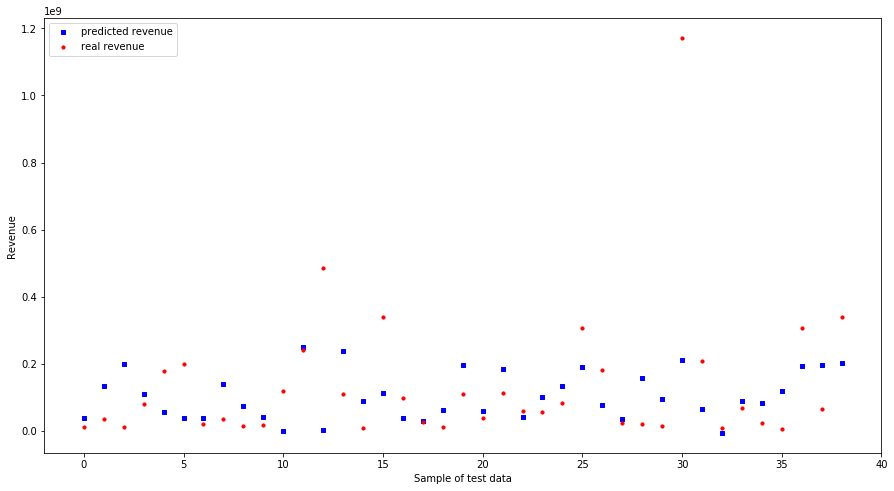

In [118]:
x = range(len(X_test))
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(x, yRidge, s=10,c='b', marker="s", label='predicted revenue')
ax1.scatter(x, pd.Series(y_test).values, s=10, c='r', marker="o", label='real revenue')
plt.xlabel("Sample of test data")
plt.ylabel("Revenue")
plt.legend(loc='upper left');
plt.show()

# Part 2
In this part you will create a Python function ``plot_decision_boundary`` that will accepts a machine learning model, feature set ``X``, and target set ``y`` as input and will plot the decision boundary of the input machine learning model  on ``(X,y)``. The following is a sample run of this function: 

```Python
%matplotlib inline
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision boundary
plot_decision_boundary(X, y, clf=svm)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')```

Sample output: 
![decision_boundary.png](attachment:decision_boundary.png)

In [1]:
def plot_decision_boundary(X, y, clf):
    from matplotlib.colors import ListedColormap
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    
    # Make predictions across region of interest
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # Plot decision boundary in region of interest
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    pass

### Plot decision boundary, take iris dataset as sample

In [59]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+ str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [64]:
X = iris.data[:, [0, 2]]
y = iris.target

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train,y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
svm.predict(X_test)

array([1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       1, 0, 2, 0, 2, 1, 0, 0])

In [83]:
y_test

array([1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       1, 0, 2, 0, 2, 1, 0, 0])

In [84]:
def plot_decision_boundary(X, y, clf):
    from matplotlib.colors import ListedColormap
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    
    # Make predictions across region of interest
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # Plot decision boundary in region of interest
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    pass

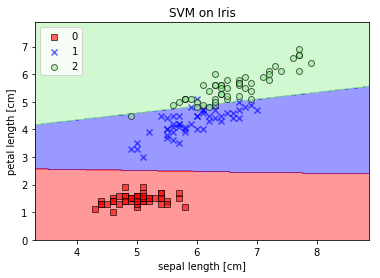

In [86]:
plot_decision_boundary(X, y, clf=svm)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

plt.legend(loc='upper left')
plt.show()

### Above illustration shows the decision boundary distribution of iris data